# Heart Disease Prediction. 🔍

# ➡️ Import Modules

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# ➡️ Loading Dataset 📔

## About Data

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Attribute Information 📑

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [91]:
df = pd.read_csv('./data/heart.csv')

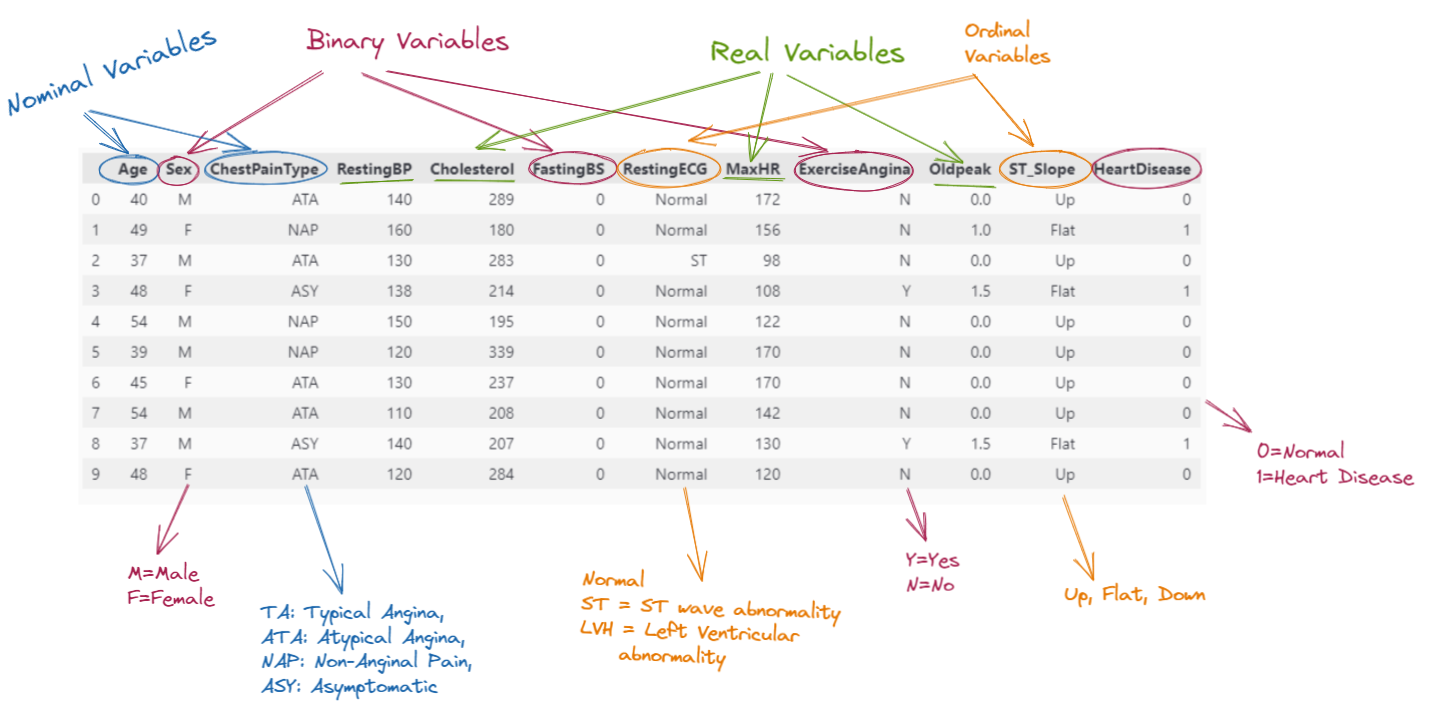

In [92]:
from IPython.display import Image
Image(filename='./data/heartdiseases.png') 

In [93]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# ➡️ EDA

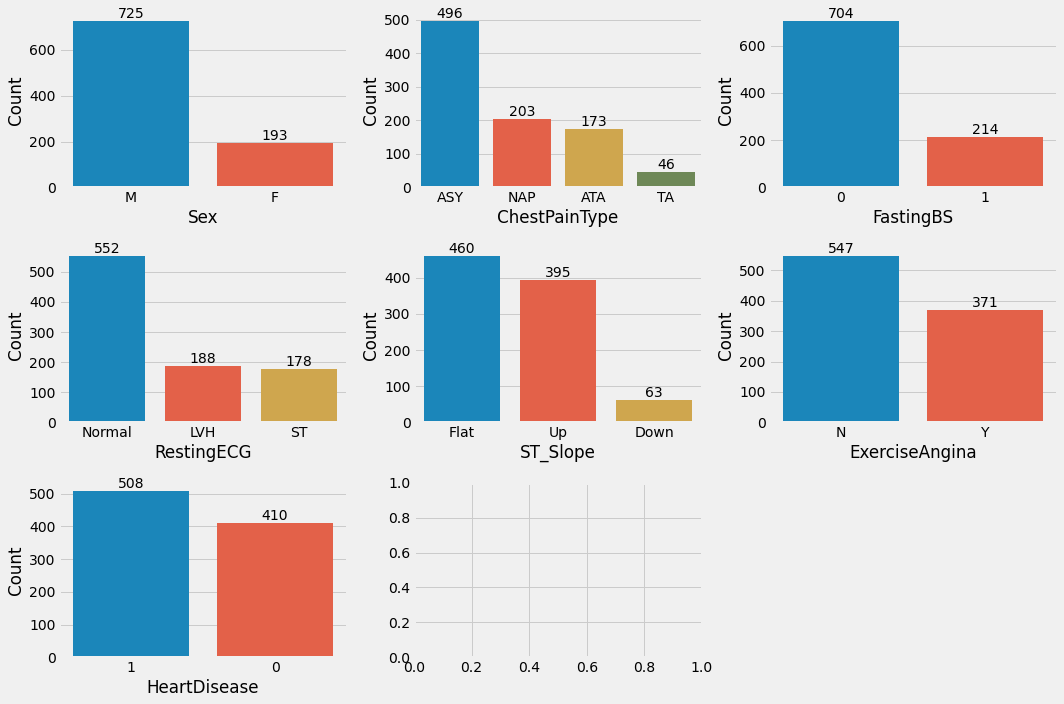

In [94]:
cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ST_Slope', 'ExerciseAngina', 'HeartDisease']
fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.countplot(df[col], ax=ax, order=df[col].value_counts().index)
  ax.set_ylabel("Count")
  
  # If you want to show values on chart
  for i in ax.containers:
    ax.bar_label(i,)

plt.delaxes()
fig.tight_layout()
plt.show()
  

## 💡 **Insights**
1. We have 3 times more Male patients than Female patients.
2. Most patients have Asymptomatic chest pain type followed by Non-Aginal > Atypical-Agina > Typical-Agina
3. Very few patients have fasting blood sugar greater than 120 mg/dl(about 23%).Fasting blood sugar means they are diabetic.
4. Majority of patients have Normal Resting Electrocardiogram Results.
5. Flat and Up Slope of ST segment are close to each other while patients with Down Slope are very few.
6. Patients with No ExerciseAgina(heart pain) are more.

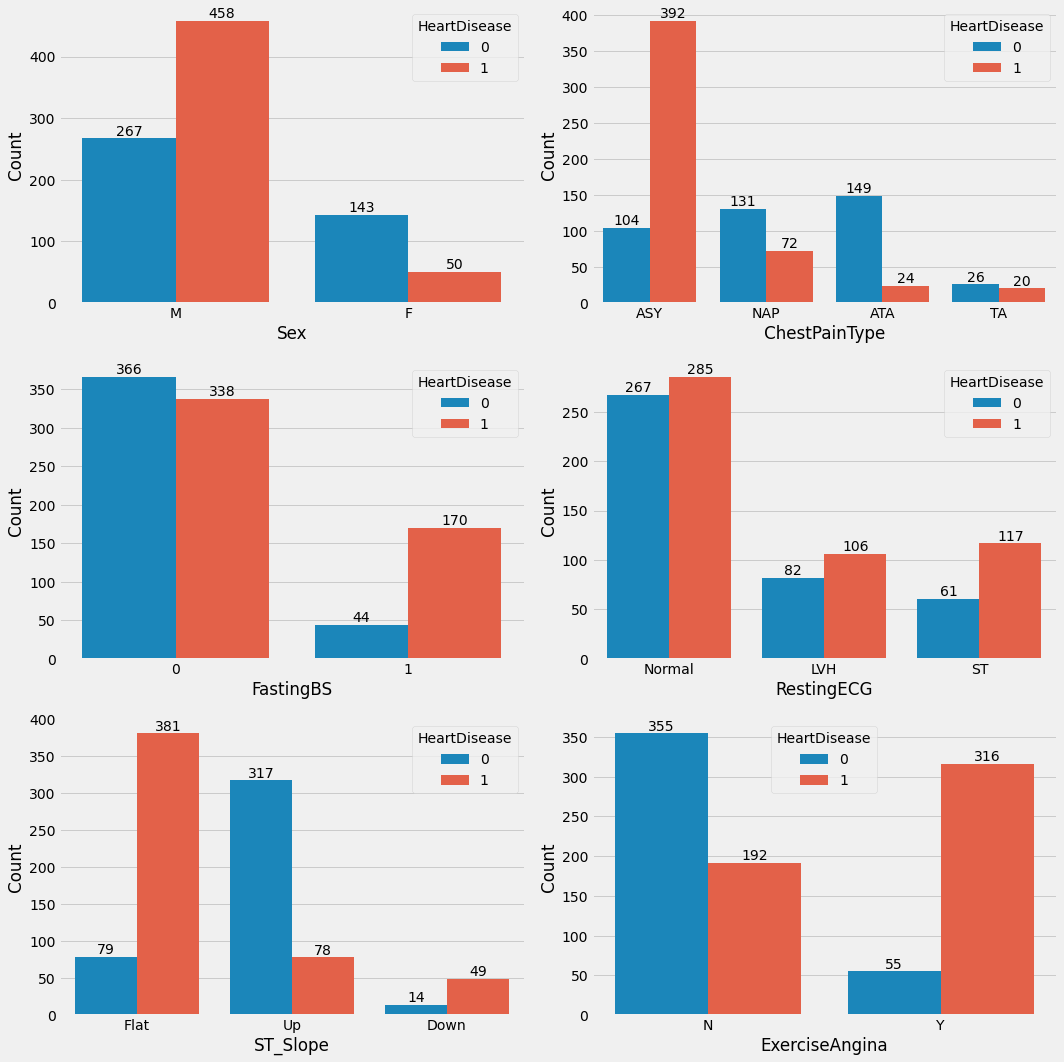

In [95]:
cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ST_Slope', 'ExerciseAngina']
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.countplot(df[col], ax=ax, order=df[col].value_counts().index, hue=df['HeartDisease'])
  ax.set_ylabel("Count")
  
  # If you want to show values on chart
  for i in ax.containers:
    ax.bar_label(i,)


fig.tight_layout()
plt.show()
  

## 💡 **Insights**
1. Look's like Male patient's are more likely to have heart disease than Female patients after being diagnosed.
2. Patients having Asymptomatic chest pain have 80 percent chance of having heart disease.
3. Patient's having Fasting Blood sugar greater than 120 mg/dl are more prone to having heart disease.
4. It's 85 percent odds of having Heart Disease if you experience Angina(type of chest pain caused by reduced blood flow to the heart)
5. Flat slope of peak exercise ST segment may presumably be heart disease.

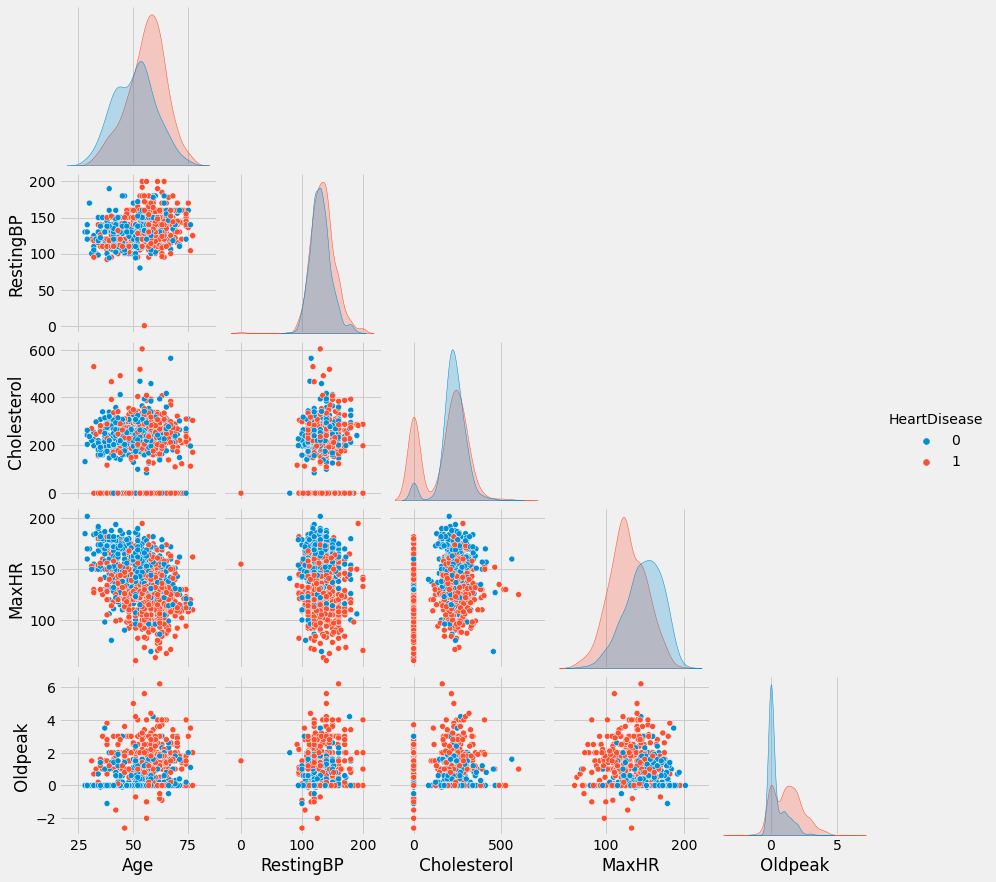

In [96]:
# We have Four Real Variables [RestingBP, Cholesterol, MaxHR, Oldpeak]
# Pairplot (Scatterplot of each variable against another)
sns.pairplot(data=df.drop('FastingBS', axis=1), hue='HeartDisease', corner=True)

## 💡 **Insights**
1. There are some interesting vertical lines in Cholesterol graph at 0 and most of them are red points indicating people with 0 cholestrol level tend to have heart disease.Same can be said for patients with near about 250 cholestrol and lower MaxHR(heart rate).
2. In graph RestingBP vs MaxHR we can see somewhat seperation of cluster showing patients with Lower HR(heart rate) and restingBP in range of 100 to 200 are likely to have heart disease
3. There are two peaks (Bimodal) in red in (Cholestrol vs Cholestrol Distribtution) indicating two regions or cluster. We usually see this Bimodal trend when data is from two different system.
4. In (Oldpeak vs Oldpeak) there is tall peak of blue centerd around 0 indicating most values of blue lie in that region
5. The blue peak is in (MaxHr vs MaxHr Distribution) is left skewed which means that data is more concentrated towards left which makes sense as Normal people tend to have more heart rate.


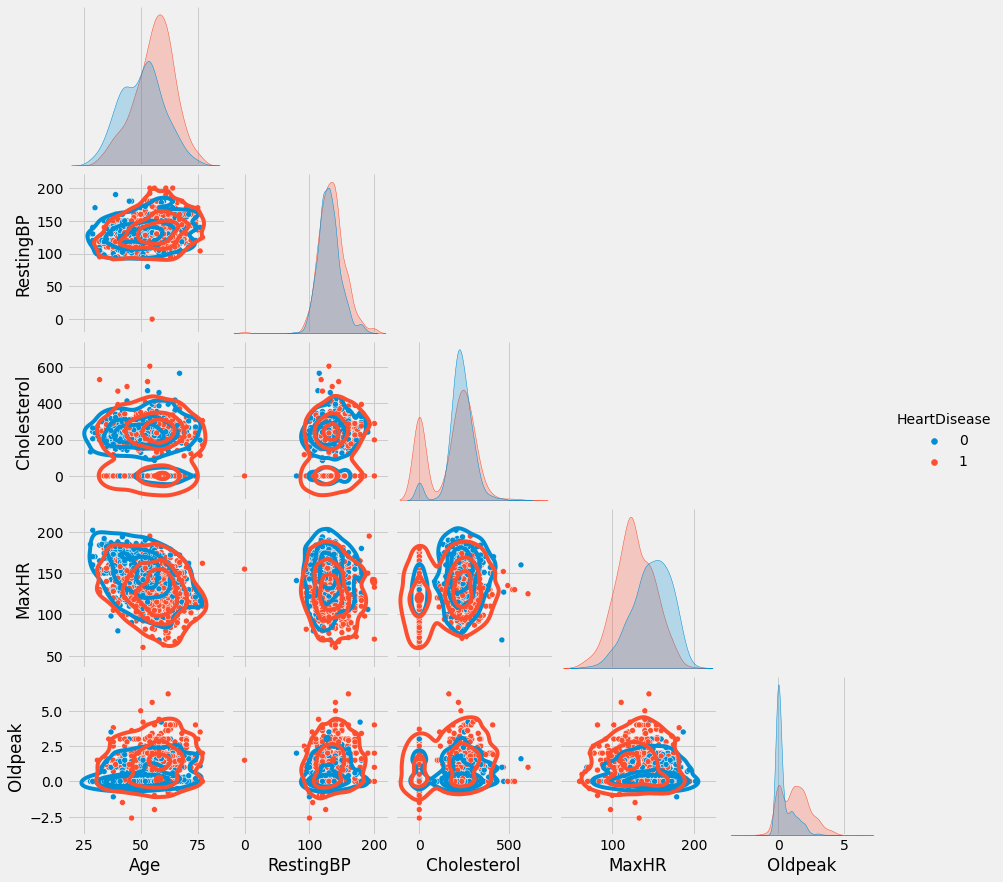

In [97]:
g = sns.pairplot(data=df.drop('FastingBS', axis=1), hue='HeartDisease', corner=True, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

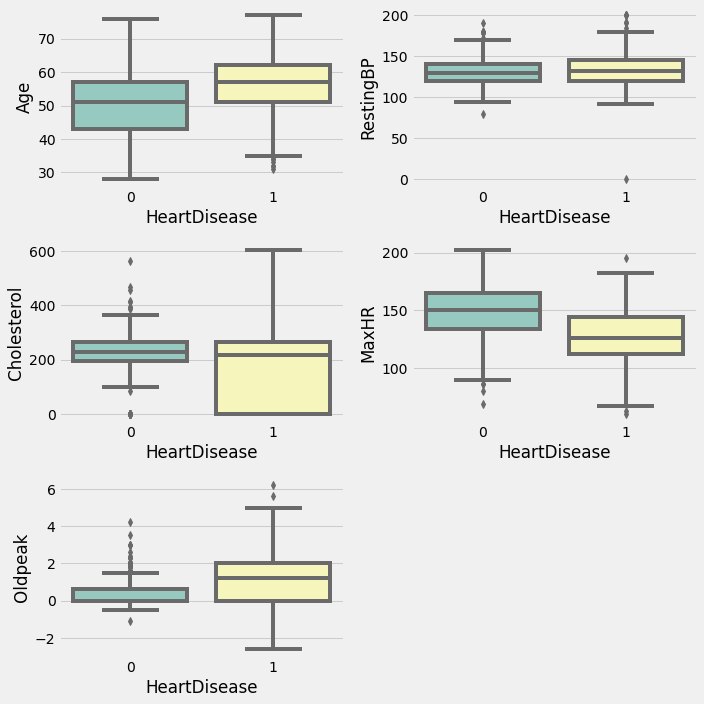

In [98]:

cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.boxplot(x="HeartDisease", y=col, data=df, palette="Set3", ax=ax)
fig.delaxes(axes[5])
fig.tight_layout()
plt.show()

## 💡 **Insights**
1. (Cholestrol Vs HeartDisease Graph) seems compelling indicating heart disease patients have cholesterol in range of 0 to about 250
2. (Age vs HeartDisease Graph) shows us that heart disease is common in age from 49 to 63 age approx
3. (Oldpeak vs HeartDisease Graph), Oldpeak ranges from 0 to 2 in most HD patients
4. RestingBP doesent have much effect on heart disease.

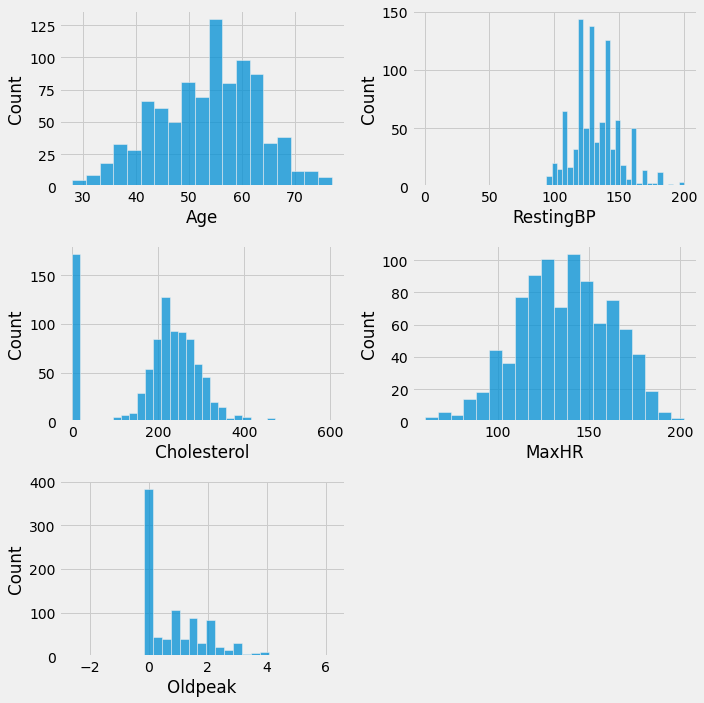

In [99]:

cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.histplot(x=col,data=df, ax=ax)
fig.delaxes(axes[5])
fig.tight_layout()
plt.show()

## 💡 **Insights**
1. MaxHR and Age has nice distribution
2. Cholesterol has peak arount 0 and nice normal distribution arount 220 approx
3. Resting BP and Oldpeak have random distribution

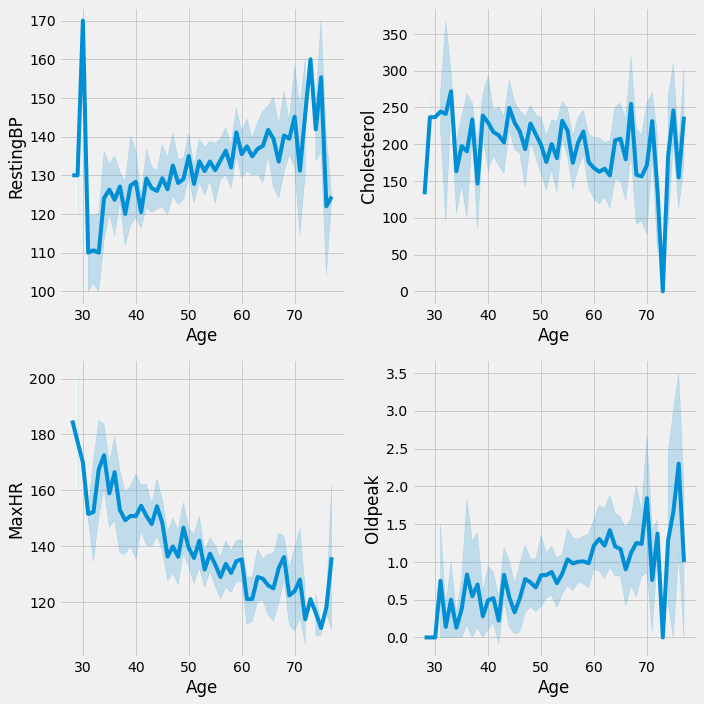

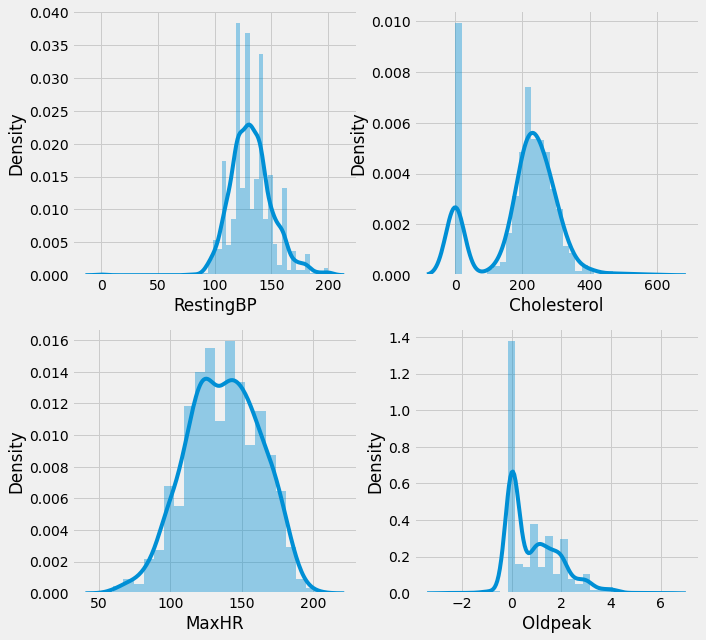

In [100]:
cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.lineplot(x="Age",y=col,data=df, ax=ax)
fig.tight_layout()
plt.show()

# Distplot for Numerical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.ravel()
for col, ax in zip(cols, axes): 
  sns.distplot(df[col], ax=ax)
plt.show()

## 💡 **Insights**
1. Look's like RestingBP and Old have Positive correlation with age(i.e as age increases both of those values tend to increase)
2. While MaxHR values shrink as the Age Increase which makes sense as older people have lower heart rate.
3. There slightly negative trend in Cholesterol vs Age

In [101]:
import plotly.express as px
fig = px.scatter_3d(df, x='MaxHR', y='RestingBP', z='Cholesterol',
              color='HeartDisease', template='ggplot2')
fig.show()

fig = px.scatter(df, x='MaxHR', y='Cholesterol', size='Age', color='HeartDisease', log_x=True, template ='ggplot2')
fig.show()

### *Lot's of Heart Disease datpoints are on RestingBP and MaxHR plane*

## Correlation Matrix 🔢

<AxesSubplot:>

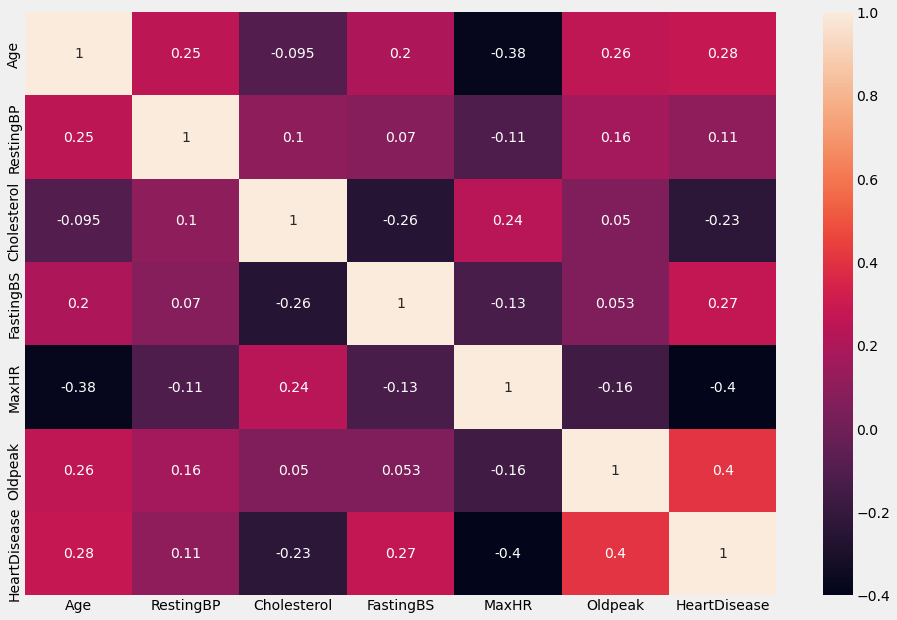

In [102]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

### Oldpeak has highest correlation (about 0.4) with our target variable followed by Age and FastingBS which are pretty much same correlation.

# ➡️ Preprocessing the Data

### 1. Checking for null values.

In [103]:
# Load
df = pd.read_csv('./data/heart.csv')
df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

#### That's good we don't have any null values.

In [104]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


### 2. Encoding our variables

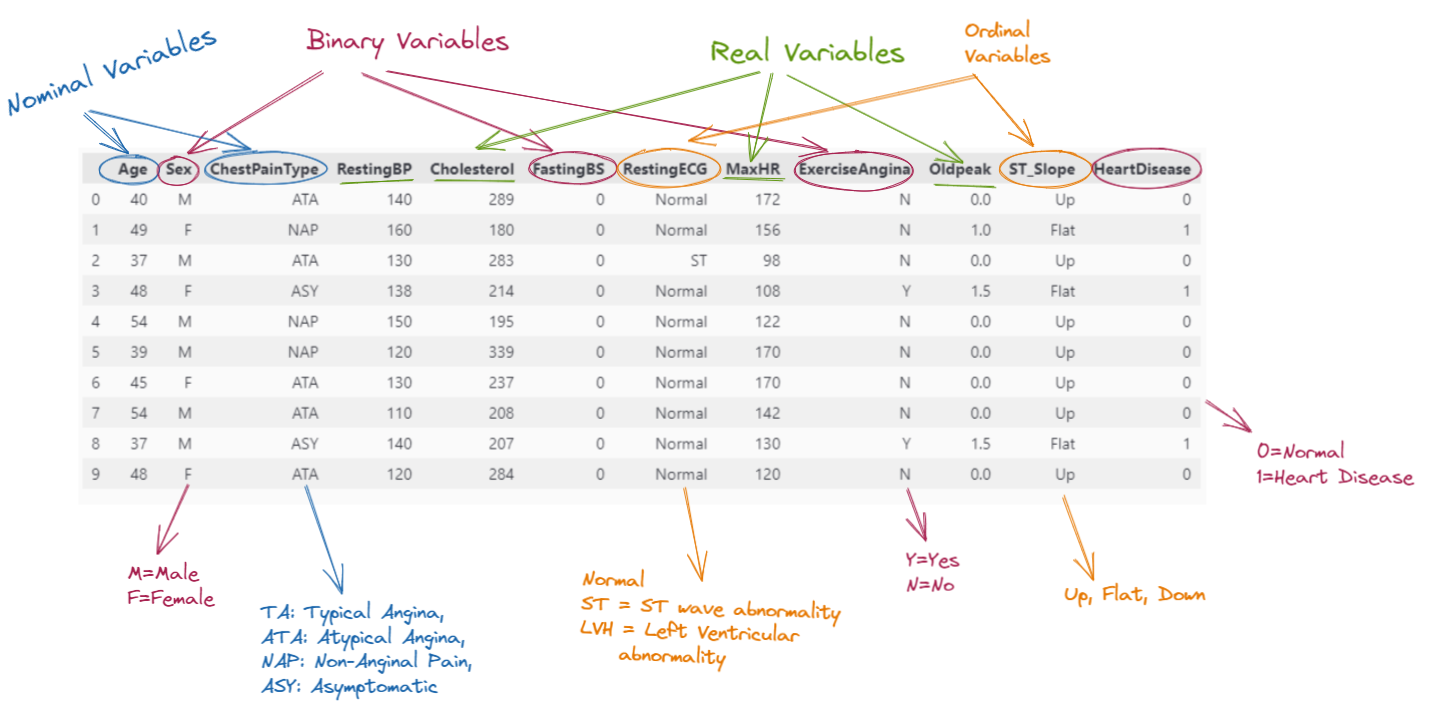

In [105]:
from IPython.display import Image
Image(filename='./data/heartdiseases.png') 

In [106]:
# Let's LabelEncode our Binary Features ['Sex', 'FastingBS', 'ExerciseAngina'] in {0,1} form ('HeartDisease is already encoded)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Sex', 'FastingBS', 'ExerciseAngina']:
  df[col+'Enc'] = le.fit_transform(df[col])

# One-Hot Encoding Features with more than 2 Unique Variable
cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df = pd.get_dummies(data=df, columns=cols)

df.head(2)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,SexEnc,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,N,0.0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,49,F,160,180,0,156,N,1.0,1,0,...,0,0,1,0,0,1,0,0,1,0


### 3. Selecting required Features after preprocessing

In [107]:
# as we already have ence
cols_to_remove = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope']
df_processed = df.loc[:, ~df.columns.isin(cols_to_remove)]
df_processed.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'SexEnc', 'FastingBSEnc', 'ExerciseAnginaEnc', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [108]:
df_processed.head(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,SexEnc,FastingBSEnc,ExerciseAnginaEnc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


### 4. Balancing Dataset

1    508
0    410
Name: HeartDisease, dtype: int64


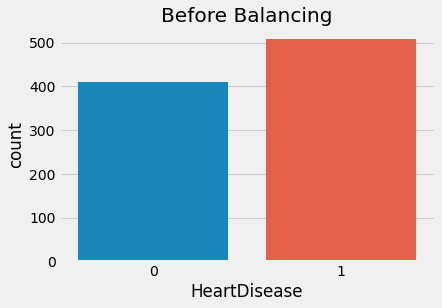

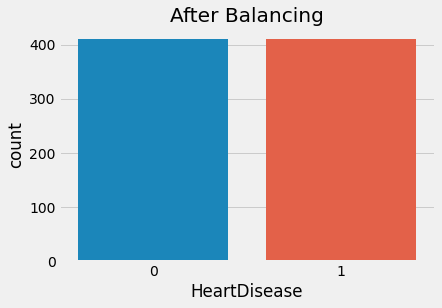

In [109]:
print(df_processed['HeartDisease'].value_counts())
sns.countplot(df_processed['HeartDisease'])
plt.title('Before Balancing')
plt.show()

# Finding min samples present in either category
max_samples = min(df_processed['HeartDisease'].value_counts())
# Selecting Max Samples form each category
df_HearthDisease = df_processed[df_processed.HeartDisease == 0][:max_samples]
df_Normal = df_processed[df_processed.HeartDisease == 1][:max_samples]
# Concatenating our selected features 
df_final = pd.concat([df_HearthDisease, df_Normal])

sns.countplot(df_final['HeartDisease'])
plt.title('After Balancing')
plt.show()

### 5.  Splitting Dataframe into train and test sets

In [110]:
from sklearn.model_selection import train_test_split

X = df_final.drop('HeartDisease', axis=1)
y = df_final['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

### 6. Scaling Dataset

In [111]:
# Scaling the Dataset using StandardScaler
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_train_std = SS.fit_transform(X_train)
X_test_std = SS.transform(X_test)

### 7.Feature Importance

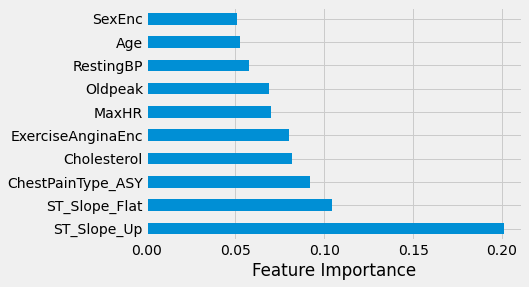

In [112]:
def feature_importance(X, y):
  # Using ExtraTreeClassifier

  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  import pandas as pd

  model = ExtraTreesClassifier()
  model.fit(X, y)

  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  feature_importance.nlargest(10).plot(kind='barh')
  plt.xlabel('Feature Importance')
  plt.show()

feature_importance(X, y)

# ➡️ Training Data on Multiple Models

In [113]:
# Our Models to Try
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = {
  "Logistic Regression": LogisticRegression(),
  "SVM": SVC(),
  "Linear SVM": LinearSVC(),
  "Nearest Centroid": NearestCentroid(),
  # "Bernoulli NB": BernoulliNB(), # Doesn't Support on Scaled Dataset
  # "Complement NB": ComplementNB(), 
  # "Multinomial NB": MultinomialNB(), 
  "Preceptron": Perceptron(),
  "KNeighbors Classifier": KNeighborsClassifier(),
  "Random Forest Classifier": RandomForestClassifier(),
  "Bagging Classifier": BaggingClassifier(),
  "Decision Tree Classifier": DecisionTreeClassifier(),
  "MLP Classifier": MLPClassifier(),
  }

In [114]:
def Classifier(models, x_train, y_train, x_test, y_test):
  models_names = []
  accuracies = []
  
  for model_name, model in models.items():
    model.fit(x_train, y_train)
    accuracy = np.round(model.score(x_test, y_test), 2)
    models_names.append(model_name)
    accuracies.append(accuracy)

  # Creating DataFrame for models and accuracys
  models_scores = pd.DataFrame(zip(models_names, accuracies), columns=['Model Name', 'Accuracy'])
  
  # Sorting aur table based on accuracies descending
  accuracy_table = models_scores.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)

  return accuracy_table

# print('Accuracy On Unscaled Dataset')
# display(Classifier(models, X_train, y_train, X_test, y_test))

print('Accuracy On Scaled Dataset')
display(Classifier(models, X_train_std, y_train, X_test_std, y_test))

Accuracy On Scaled Dataset


,Model Name,Accuracy
0,Bagging Classifier,0.90
1,Logistic Regression,0.89
2,Linear SVM,0.89
3,Random Forest Classifier,0.89
4,SVM,0.88
5,Nearest Centroid,0.87
6,MLP Classifier,0.87
7,KNeighbors Classifier,0.86
8,Preceptron,0.85
9,Decision Tree Classifier,0.85


### Tuning LogisticRegression Model 

In [115]:
from sklearn.model_selection import GridSearchCV
# Parameter's That can be optimised in SVM {'C', 'gamma', 'kernel'}
param_grid = {
  'C' : [0.01, 0.1, 1, 10, 100],
  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'fit_intercept' : [True, False],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}
# Using GridSearchCV to find best parameters
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, refit=True)
grid.fit(X_train_std, y_train)
print('Best Parameters: ', grid.best_estimator_)
print('Accuracy {:.2f}'.format(grid.score(X_test_std, y_test)))

Best Parameters:  LogisticRegression(C=0.01, fit_intercept=False, solver='newton-cg')
Accuracy 0.89


#### Displaying Model's Classification Report

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Classifier Accuracy: {:.2f}%'.format(model.score(X_test, y_test)))
print('Confusion Matrix: \n', confusion_matrix(y_pred, y_test))
print('Classification Report: \n', classification_report(y_test, y_pred))

Classifier Accuracy: 0.89%
Confusion Matrix: 
 [[113   9]
 [ 18 106]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       131
           1       0.85      0.92      0.89       115

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246



#### Using CrossValidation to see if we can improve the performance of model

In [117]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=0.01, fit_intercept=False, solver='newton-cg')
scores = cross_val_score(clf, X, y, cv=5)
print('After Applying Cross Validation: ')
print('Accuracy {:.2f}'.format(np.mean(scores)))

After Applying Cross Validation: 
Accuracy 0.81
